In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [5]:
# --- 1. CONFIGURACIÓN INICIAL Y CARGA DE IMAGEN ---
imagen_original = cv2.imread('R.jpg', cv2.IMREAD_GRAYSCALE)

if imagen_original is None:
    print("¡ERROR! No se pudo cargar la imagen 'iglesia.jpg'.")
    print("Asegúrate de haber subido el archivo a Google Colab.")
else:

    imagen_float = imagen_original.astype(np.float64)

    # --- 2. DEFINICIÓN DE LAS MÁSCARAS DE SOBEL ---

    # Máscara Horizontal (Gx) - Mide cambios en X, detecta BORDES VERTICALES
    Gx = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ], dtype=np.float64)

    # Máscara Vertical (Gy) - Mide cambios en Y, detecta BORDES HORIZONTALES
    Gy = np.array([
        [-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]
    ], dtype=np.float64)

    # --- 3. APLICACIÓN DE LAS MÁSCARAS (CONVOLUCIÓN) ---

    # La función cv2.filter2D realiza la convolución (aplicación del filtro)
    # Detección de Bordes Verticales
    bordes_verticales = cv2.filter2D(imagen_float, -1, Gx)

    # Detección de Bordes Horizontales
    bordes_horizontales = cv2.filter2D(imagen_float, -1, Gy)


Resultados de la Detección de Bordes con Sobel:


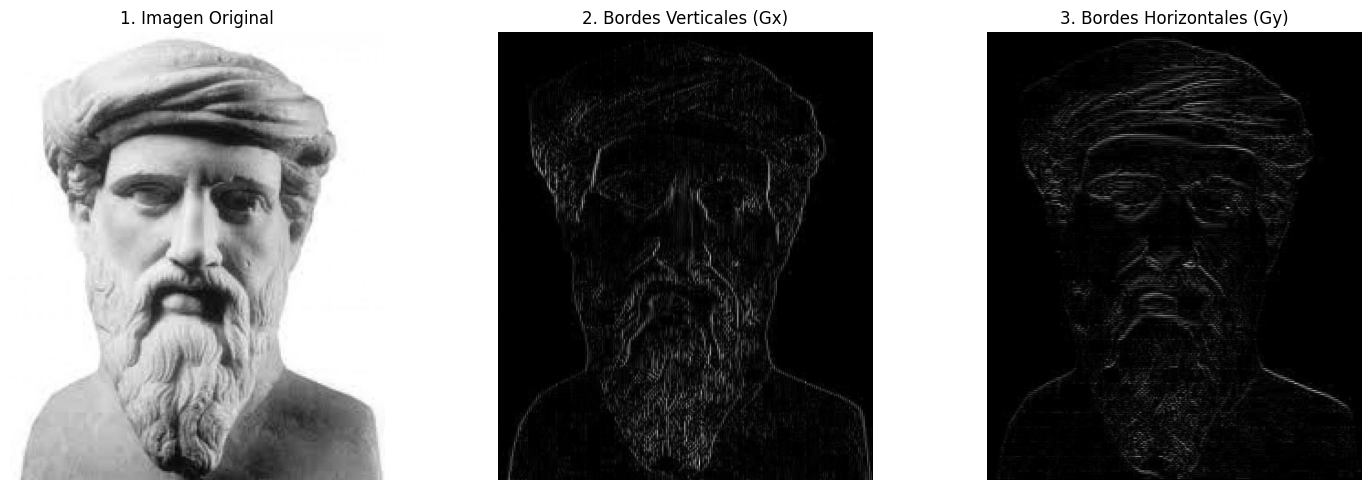

In [4]:
    # --- 4. VISUALIZACIÓN DE RESULTADOS ---

    # Se combinan los resultados para obtener la Magnitud del Gradiente (el borde completo)
    magnitud_gradiente = np.sqrt(bordes_verticales**2 + bordes_horizontales**2)
    magnitud_gradiente = cv2.normalize(magnitud_gradiente, None, 0, 255, cv2.NORM_MINMAX)
    magnitud_gradiente = magnitud_gradiente.astype(np.uint8)

    print("Resultados de la Detección de Bordes con Sobel:")

    plt.figure(figsize=(15, 5))

    # Subtrama 1: Imagen Original
    plt.subplot(1, 3, 1)
    plt.imshow(imagen_original, cmap='gray')
    plt.title('1. Imagen Original')
    plt.axis('off')

    # Subtrama 2: Bordes Verticales (Resultado de Gx)
    bordes_verticales_abs = cv2.normalize(np.abs(bordes_verticales), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    plt.subplot(1, 3, 2)
    plt.imshow(bordes_verticales_abs, cmap='gray')
    plt.title('2. Bordes Verticales (Gx)')
    plt.axis('off')

    # Subtrama 3: Bordes Horizontales (Resultado de Gy)
    bordes_horizontales_abs = cv2.normalize(np.abs(bordes_horizontales), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    plt.subplot(1, 3, 3)
    plt.imshow(bordes_horizontales_abs, cmap='gray')
    plt.title('3. Bordes Horizontales (Gy)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()